In [3]:
import pandas as pd 
import matplotlib as mpl
import numpy as np
from matplotlib import cm as cm
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
import sklearn.linear_model
import statsmodels.formula.api as smf


In [4]:
# reading in CSV data for NBA standings that will be joined to each play type CSV
Standing = pd.read_csv('NBA Standings.csv')
# reading in CSV for play type 'Cut' 
team_cut = pd.read_csv('Team - Cut.csv')
# creating a joined DF of the standings and play type
tc_joined = pd.merge(team_cut, Standing, on='Team', sort=True)
# looking at the correlation between features
tc_corr = pd.DataFrame(tc_joined, columns=['Team', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tc_corr.corr()

,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
Poss,1.000000,-0.435676,0.967247,0.951118,0.990697,-0.297350,-0.297350,-0.457988,0.027478
PPP,-0.435676,1.000000,-0.195806,-0.170676,-0.415250,0.863955,0.863955,0.945450,0.524332
PTS,0.967247,-0.195806,1.000000,0.990367,0.964765,-0.087201,-0.087201,-0.233855,0.187299
FGM,0.951118,-0.170676,0.990367,1.000000,0.958450,-0.034571,-0.034571,-0.198471,0.246897
FGA,0.990697,-0.415250,0.964765,0.958450,1.000000,-0.314146,-0.314146,-0.430561,0.076982
FG%,-0.297350,0.863955,-0.087201,-0.034571,-0.314146,1.000000,1.000000,0.820913,0.497978
eFG%,-0.297350,0.863955,-0.087201,-0.034571,-0.314146,1.000000,1.000000,0.820913,0.497978
Percentile,-0.457988,0.945450,-0.233855,-0.198471,-0.430561,0.820913,0.820913,1.000000,0.560021
Standing,0.027478,0.524332,0.187299,0.246897,0.076982,0.497978,0.497978,0.560021,1.000000


In [19]:
# setting my X and y to use in the OLS model 
# all of my X's will be my predictors with my y being my outcome
X = tc_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tc_joined['Standing']

#creating a fitted model where trying to see how well my X's predict my y
lm = smf.ols(formula='y ~ X', data=tc_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3.784
Date:                Thu, 28 Apr 2016   Prob (F-statistic):            0.00827
Time:                        13:27:36   Log-Likelihood:                 22.209
No. Observations:                  29   AIC:                            -28.42
Df Residuals:                      21   BIC:                            -17.48
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0007      0.001      1.052      0.305        -0.001     0.002
X[0]           0.0563      0.054      1.052      0.305        -0.055     0.168
X[1]          -0.0044      0.011     -0.400      0.694        -0.027     0.019
X[2]          -1.9044      6.147     -0.310      0.760       -14.689    10.880
X[3]           0.0011      0.009      0.120      0.906        -0.018     0.021
X[4]           0.0117      0.018      0.667      0.512        -0.025     0.048
X[5]          -0.0033      0.011     -0.298      0.768        -0.026     0.020
X[6]          -0.0166      0.044     -0.379      0.709        -0.108     0.074
X[7]          -0.0166      0.044     -0.379      0.709        -0.108     0.074
X[8]           0.0025      0.003      0.951      0.352        -0.003     0.008
==============================================================================
Omnibus:                        0.895   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.851
Skew:                          -0.204   Prob(JB):                        0.653
Kurtosis:                       2.267   Cond. No.                     2.94e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.51e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
team_hand_off = pd.read_csv('Team - Hand Off.csv')
tho_joined = pd.merge(team_hand_off, Standing, on='Team', sort=True)
tho_corr = pd.DataFrame(tho_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tho_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,-0.038792,0.973501,0.969626,0.994247,-0.016962,-0.015782,0.009675,-0.175300
PPP,NaN,-0.038792,1.000000,0.183728,0.129929,-0.049216,0.759571,0.849933,0.894943,0.298476
PTS,NaN,0.973501,0.183728,1.000000,0.983919,0.965332,0.157308,0.174955,0.219558,-0.125951
FGM,NaN,0.969626,0.129929,0.983919,1.000000,0.969360,0.200514,0.166177,0.147265,-0.136843
FGA,NaN,0.994247,-0.049216,0.965332,0.969360,1.000000,-0.041933,-0.047336,0.005465,-0.173588
FG%,NaN,-0.016962,0.759571,0.157308,0.200514,-0.041933,1.000000,0.894028,0.568457,0.173137
eFG%,NaN,-0.015782,0.849933,0.174955,0.166177,-0.047336,0.894028,1.000000,0.716115,0.183931
Percentile,NaN,0.009675,0.894943,0.219558,0.147265,0.005465,0.568457,0.716115,1.000000,0.042782
Standing,NaN,-0.175300,0.298476,-0.125951,-0.136843,-0.173588,0.173137,0.183931,0.042782,1.000000


In [80]:
X = tho_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tho_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=tho_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     2.608
Date:                Thu, 28 Apr 2016   Prob (F-statistic):             0.0392
Time:                        00:24:07   Log-Likelihood:                 20.738
No. Observations:                  29   AIC:                            -23.48
Df Residuals:                      20   BIC:                            -11.17
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -3.31e-05      0.000     -0.106      0.917        -0.001     0.001
X[0]          -0.0027      0.026     -0.106      0.917        -0.056     0.051
X[1]           0.0059      0.007      0.848      0.407        -0.009     0.020
X[2]           8.1209      2.472      3.285      0.004         2.964    13.277
X[3]          -0.0073      0.007     -0.999      0.330        -0.023     0.008
X[4]           0.0408      0.024      1.671      0.110        -0.010     0.092
X[5]          -0.0160      0.010     -1.547      0.137        -0.038     0.006
X[6]          -0.1471      0.078     -1.896      0.072        -0.309     0.015
X[7]           0.0010      0.022      0.046      0.964        -0.046     0.048
X[8]          -0.0089      0.003     -3.134      0.005        -0.015    -0.003
==============================================================================
Omnibus:                        0.475   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.590
Skew:                          -0.246   Prob(JB):                        0.745
Kurtosis:                       2.505   Cond. No.                     3.66e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
team_isolations = pd.read_csv('Team - Isolations.csv')
ti_joined = pd.merge(team_isolations, Standing, on='Team', sort=True)
ti_corr = pd.DataFrame(ti_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
ti_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,0.039819,0.945400,0.902579,0.989256,-0.174912,-0.102173,-0.009943,-0.285738
PPP,NaN,0.039819,1.000000,0.356369,0.406052,0.065923,0.866593,0.912738,0.986215,0.477939
PTS,NaN,0.945400,0.356369,1.000000,0.975223,0.945776,0.103953,0.189025,0.307045,-0.100443
FGM,NaN,0.902579,0.406052,0.975223,1.000000,0.917241,0.226495,0.277021,0.345958,-0.049115
FGA,NaN,0.989256,0.065923,0.945776,0.917241,1.000000,-0.167600,-0.097473,0.014578,-0.249543
FG%,NaN,-0.174912,0.866593,0.103953,0.226495,-0.167600,1.000000,0.957506,0.838567,0.470457
eFG%,NaN,-0.102173,0.912738,0.189025,0.277021,-0.097473,0.957506,1.000000,0.886510,0.468138
Percentile,NaN,-0.009943,0.986215,0.307045,0.345958,0.014578,0.838567,0.886510,1.000000,0.453947
Standing,NaN,-0.285738,0.477939,-0.100443,-0.049115,-0.249543,0.470457,0.468138,0.453947,1.000000


In [81]:
X = ti_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = ti_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=ti_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1.936
Date:                Thu, 28 Apr 2016   Prob (F-statistic):              0.110
Time:                        00:26:10   Log-Likelihood:                 18.694
No. Observations:                  29   AIC:                            -19.39
Df Residuals:                      20   BIC:                            -7.082
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -5.721e-05      0.000     -0.123      0.904        -0.001     0.001
X[0]          -0.0047      0.038     -0.123      0.904        -0.084     0.075
X[1]          -0.0084      0.006     -1.376      0.184        -0.021     0.004
X[2]          -0.1512      6.423     -0.024      0.981       -13.550    13.248
X[3]           0.0089      0.007      1.200      0.244        -0.007     0.024
X[4]          -0.0092      0.014     -0.677      0.506        -0.037     0.019
X[5]           0.0040      0.005      0.761      0.456        -0.007     0.015
X[6]           0.0534      0.085      0.626      0.538        -0.125     0.232
X[7]          -0.0071      0.038     -0.186      0.855        -0.087     0.072
X[8]          -0.0083      0.007     -1.244      0.228        -0.022     0.006
==============================================================================
Omnibus:                        0.471   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.365
Skew:                           0.254   Prob(JB):                        0.833
Kurtosis:                       2.790   Cond. No.                     3.94e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
team_off_screens = pd.read_csv('Team - Off Screens.csv')
tos_joined = pd.merge(team_off_screens, Standing, on='Team', sort=True)
tos_corr = pd.DataFrame(tos_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tos_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,0.388945,0.983504,0.984555,0.997078,0.404860,0.355837,0.329197,0.447491
PPP,NaN,0.388945,1.000000,0.533049,0.512957,0.391243,0.804964,0.971786,0.965377,0.403563
PTS,NaN,0.983504,0.533049,1.000000,0.993250,0.982234,0.493953,0.499931,0.474093,0.496801
FGM,NaN,0.984555,0.512957,0.993250,1.000000,0.985044,0.531983,0.481752,0.450039,0.495286
FGA,NaN,0.997078,0.391243,0.982234,0.985044,1.000000,0.390661,0.353063,0.332767,0.463854
FG%,NaN,0.404860,0.804964,0.493953,0.531983,0.390661,1.000000,0.823366,0.753895,0.329977
eFG%,NaN,0.355837,0.971786,0.499931,0.481752,0.353063,0.823366,1.000000,0.941921,0.398148
Percentile,NaN,0.329197,0.965377,0.474093,0.450039,0.332767,0.753895,0.941921,1.000000,0.471595
Standing,NaN,0.447491,0.403563,0.496801,0.495286,0.463854,0.329977,0.398148,0.471595,1.000000


In [83]:
X = tos_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tos_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=tos_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     2.386
Date:                Thu, 28 Apr 2016   Prob (F-statistic):             0.0549
Time:                        00:30:22   Log-Likelihood:                 20.094
No. Observations:                  29   AIC:                            -22.19
Df Residuals:                      20   BIC:                            -9.882
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      2.136      0.045      1.27e-05     0.001
X[0]           0.0444      0.021      2.136      0.045         0.001     0.088
X[1]          -0.0046      0.005     -0.919      0.369        -0.015     0.006
X[2]          -4.5967      2.633     -1.746      0.096       -10.089     0.895
X[3]           0.0018      0.005      0.374      0.713        -0.008     0.012
X[4]           0.0018      0.015      0.119      0.906        -0.030     0.033
X[5]           0.0028      0.006      0.446      0.660        -0.010     0.016
X[6]           0.0062      0.057      0.109      0.914        -0.112     0.125
X[7]           0.0077      0.034      0.227      0.822        -0.063     0.078
X[8]           0.0081      0.004      2.256      0.035         0.001     0.016
==============================================================================
Omnibus:                        0.332   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.847   Jarque-Bera (JB):                0.110
Skew:                           0.147   Prob(JB):                        0.946
Kurtosis:                       2.936   Cond. No.                     2.54e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
team_pnr_bh = pd.read_csv('Team - PicknRoll Ball Handler.csv')
tpb_joined = pd.merge(team_pnr_bh, Standing, on='Team', sort=True)
tpb_corr = pd.DataFrame(tpb_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tpb_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,0.168370,0.947476,0.934392,0.983122,-0.034905,-0.042077,0.280675,-0.066998
PPP,NaN,0.168370,1.000000,0.469086,0.412144,0.222447,0.766453,0.878711,0.955555,0.687645
PTS,NaN,0.947476,0.469086,1.000000,0.969287,0.948638,0.219962,0.235620,0.564541,0.147407
FGM,NaN,0.934392,0.412144,0.969287,1.000000,0.963903,0.278803,0.236703,0.509748,0.159744
FGA,NaN,0.983122,0.222447,0.948638,0.963903,1.000000,0.016877,0.011042,0.323870,-0.012016
FG%,NaN,-0.034905,0.766453,0.219962,0.278803,0.016877,1.000000,0.893514,0.751800,0.663549
eFG%,NaN,-0.042077,0.878711,0.235620,0.236703,0.011042,0.893514,1.000000,0.808252,0.662413
Percentile,NaN,0.280675,0.955555,0.564541,0.509748,0.323870,0.751800,0.808252,1.000000,0.607988
Standing,NaN,-0.066998,0.687645,0.147407,0.159744,-0.012016,0.663549,0.662413,0.607988,1.000000


In [86]:
X = tpb_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tpb_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=tpb_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.7170
Date:                Thu, 28 Apr 2016   Prob (F-statistic):              0.675
Time:                        01:03:22   Log-Likelihood:                 14.034
No. Observations:                  29   AIC:                            -10.07
Df Residuals:                      20   BIC:                             2.238
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0004      0.000     -0.840      0.411        -0.001     0.001
X[0]          -0.0337      0.040     -0.840      0.411        -0.117     0.050
X[1]           0.0067      0.014      0.485      0.633        -0.022     0.035
X[2]           4.4413      6.513      0.682      0.503        -9.144    18.026
X[3]          -0.0073      0.013     -0.565      0.579        -0.034     0.020
X[4]           0.0037      0.035      0.108      0.915        -0.069     0.076
X[5]          -0.0017      0.018     -0.092      0.928        -0.040     0.037
X[6]           0.1539      0.244      0.630      0.536        -0.356     0.663
X[7]          -0.1694      0.192     -0.881      0.389        -0.571     0.232
X[8]          -0.0039      0.005     -0.864      0.398        -0.013     0.006
==============================================================================
Omnibus:                        2.143   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                0.986
Skew:                           0.370   Prob(JB):                        0.611
Kurtosis:                       3.519   Cond. No.                     2.89e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

P Values: [        nan  0.12857116  0.67910761  0.09664656  0.09888454  0.13479531
  0.64403256  0.63181386  0.39445435]
Coefficients: [  0.00000000e+00   6.67930418e-03   4.44126234e+00  -7.25453656e-03
   3.74865026e-03  -1.68333160e-03   1.53861360e-01  -1.69423766e-01
  -3.94817007e-03]
y-intercept: -2.76232730126
R-Squared: 0.222878365467


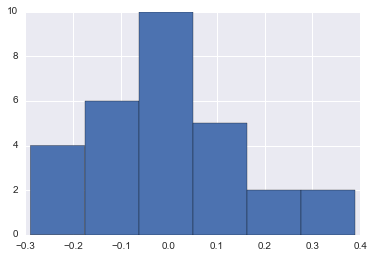

In [85]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo

X = tpb_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tpb_joined['Standing']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [65]:
team_pnr_rm = pd.read_csv('Team - PicknRoll Roll Man.csv')
tpr_joined = pd.merge(team_pnr_rm, Standing, on='Team', sort=True)
tpr_corr = pd.DataFrame(tpr_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tpr_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,0.016811,0.958629,0.966276,0.991467,-0.031845,-0.071838,0.044366,-0.066072
PPP,NaN,0.016811,1.000000,0.297566,0.195188,0.003280,0.759940,0.915344,0.933579,0.348297
PTS,NaN,0.958629,0.297566,1.000000,0.975307,0.946025,0.176238,0.184369,0.307523,0.029206
FGM,NaN,0.966276,0.195188,0.975307,1.000000,0.966607,0.192187,0.122444,0.206970,0.007512
FGA,NaN,0.991467,0.003280,0.946025,0.966607,1.000000,-0.061043,-0.094851,0.028731,-0.057126
FG%,NaN,-0.031845,0.759940,0.176238,0.192187,-0.061043,1.000000,0.863803,0.706387,0.240038
eFG%,NaN,-0.071838,0.915344,0.184369,0.122444,-0.094851,0.863803,1.000000,0.860266,0.346991
Percentile,NaN,0.044366,0.933579,0.307523,0.206970,0.028731,0.706387,0.860266,1.000000,0.301344
Standing,NaN,-0.066072,0.348297,0.029206,0.007512,-0.057126,0.240038,0.346991,0.301344,1.000000


In [87]:
X = tpr_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tpr_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=tpr_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                 -0.116
Method:                 Least Squares   F-statistic:                    0.6365
Date:                Thu, 28 Apr 2016   Prob (F-statistic):              0.738
Time:                        01:04:29   Log-Likelihood:                 13.667
No. Observations:                  29   AIC:                            -9.333
Df Residuals:                      20   BIC:                             2.972
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0003      0.001     -0.421      0.678        -0.002     0.001
X[0]          -0.0233      0.055     -0.421      0.678        -0.139     0.092
X[1]           0.0075      0.009      0.797      0.435        -0.012     0.027
X[2]           5.9358      5.696      1.042      0.310        -5.947    17.818
X[3]          -0.0084      0.009     -0.977      0.340        -0.026     0.010
X[4]           0.0155      0.017      0.942      0.358        -0.019     0.050
X[5]          -0.0067      0.009     -0.774      0.448        -0.025     0.011
X[6]          -0.0933      0.088     -1.058      0.303        -0.277     0.091
X[7]           0.0223      0.039      0.577      0.570        -0.058     0.103
X[8]          -0.0005      0.003     -0.149      0.883        -0.007     0.006
==============================================================================
Omnibus:                        3.517   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.208
Skew:                           0.290   Prob(JB):                        0.332
Kurtosis:                       4.221   Cond. No.                     4.25e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
team_post_up = pd.read_csv('Team - Post Up.csv')
tpu_joined = pd.merge(team_post_up, Standing, on='Team', sort=True)
tpu_corr = pd.DataFrame(tpu_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tpu_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,0.235107,0.975296,0.965379,0.993346,0.095811,0.095811,0.239666,-0.082255
PPP,NaN,0.235107,1.000000,0.434367,0.424780,0.238104,0.882689,0.882689,0.956805,0.222548
PTS,NaN,0.975296,0.434367,1.000000,0.990778,0.971370,0.283445,0.283445,0.423745,-0.000528
FGM,NaN,0.965379,0.424780,0.990778,1.000000,0.972277,0.312738,0.312738,0.412993,0.044536
FGA,NaN,0.993346,0.238104,0.971370,0.972277,1.000000,0.092862,0.092862,0.239202,-0.033437
FG%,NaN,0.095811,0.882689,0.283445,0.312738,0.092862,1.000000,1.000000,0.851282,0.243835
eFG%,NaN,0.095811,0.882689,0.283445,0.312738,0.092862,1.000000,1.000000,0.851282,0.243835
Percentile,NaN,0.239666,0.956805,0.423745,0.412993,0.239202,0.851282,0.851282,1.000000,0.058677
Standing,NaN,-0.082255,0.222548,-0.000528,0.044536,-0.033437,0.243835,0.243835,0.058677,1.000000


In [88]:
X = tpu_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tpu_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=tpu_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     3.624
Date:                Thu, 28 Apr 2016   Prob (F-statistic):             0.0102
Time:                        01:04:49   Log-Likelihood:                 21.863
No. Observations:                  29   AIC:                            -27.73
Df Residuals:                      21   BIC:                            -16.79
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0002      0.000     -0.751      0.461        -0.001     0.000
X[0]          -0.0177      0.024     -0.751      0.461        -0.067     0.031
X[1]          -0.0078      0.004     -1.932      0.067        -0.016     0.001
X[2]          -0.1807      3.602     -0.050      0.960        -7.671     7.309
X[3]           0.0062      0.005      1.340      0.195        -0.003     0.016
X[4]          -0.0096      0.011     -0.860      0.400        -0.033     0.014
X[5]           0.0072      0.005      1.427      0.168        -0.003     0.018
X[6]           0.0302      0.029      1.050      0.305        -0.030     0.090
X[7]           0.0302      0.029      1.050      0.305        -0.030     0.090
X[8]          -0.0088      0.003     -2.892      0.009        -0.015    -0.002
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   2.529
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                0.796
Skew:                           0.110   Prob(JB):                        0.672
Kurtosis:                       3.782   Cond. No.                     6.41e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.89e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
team_spot_up = pd.read_csv('Team - Spot Up.csv')
tsu_joined = pd.merge(team_spot_up, Standing, on='Team', sort=True)
tsu_corr = pd.DataFrame(tsu_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tsu_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,0.128053,0.917136,0.910641,0.989432,0.093681,0.157298,0.259904,0.008932
PPP,NaN,0.128053,1.000000,0.509840,0.455904,0.167686,0.817151,0.960893,0.958942,0.719226
PTS,NaN,0.917136,0.509840,1.000000,0.976431,0.925361,0.415198,0.522651,0.611709,0.292000
FGM,NaN,0.910641,0.455904,0.976431,1.000000,0.924169,0.469976,0.478690,0.562113,0.287596
FGA,NaN,0.989432,0.167686,0.925361,0.924169,1.000000,0.099447,0.177010,0.307251,0.057217
FG%,NaN,0.093681,0.817151,0.415198,0.469976,0.099447,1.000000,0.856763,0.760840,0.625897
eFG%,NaN,0.157298,0.960893,0.522651,0.478690,0.177010,0.856763,1.000000,0.937059,0.700864
Percentile,NaN,0.259904,0.958942,0.611709,0.562113,0.307251,0.760840,0.937059,1.000000,0.687919
Standing,NaN,0.008932,0.719226,0.292000,0.287596,0.057217,0.625897,0.700864,0.687919,1.000000


In [89]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = tsu_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tsu_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=tsu_joined).fit()
#print the full summary
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     3.836
Date:                Thu, 28 Apr 2016   Prob (F-statistic):            0.00696
Time:                        01:05:18   Log-Likelihood:                 23.862
No. Observations:                  29   AIC:                            -29.72
Df Residuals:                      20   BIC:                            -17.42
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0008      0.001     -0.831      0.416        -0.003     0.001
X[0]          -0.0650      0.078     -0.831      0.416        -0.228     0.098
X[1]           0.0037      0.004      0.873      0.393        -0.005     0.012
X[2]           9.4121      6.981      1.348      0.193        -5.151    23.975
X[3]          -0.0061      0.004     -1.378      0.183        -0.015     0.003
X[4]           0.0117      0.017      0.692      0.497        -0.024     0.047
X[5]          -0.0020      0.007     -0.300      0.768        -0.016     0.012
X[6]          -0.1569      0.269     -0.583      0.566        -0.718     0.404
X[7]           0.0549      0.050      1.099      0.285        -0.049     0.159
X[8]          -0.0009      0.004     -0.215      0.832        -0.010     0.008
==============================================================================
Omnibus:                        1.038   Durbin-Watson:                   2.280
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.848
Skew:                          -0.102   Prob(JB):                        0.654
Kurtosis:                       2.188   Cond. No.                     8.67e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.29e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
team_put_backs = pd.read_csv('Team - Put Backs.csv')
tpb_joined = pd.merge(team_put_backs, Standing, on='Team', sort=True)
tpb_corr = pd.DataFrame(tpb_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tpb_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,-0.029993,0.930508,0.936852,0.992139,-0.004437,-0.017174,0.002817,-0.288863
PPP,NaN,-0.029993,1.000000,0.334163,0.291543,-0.063669,0.972903,0.973246,0.956699,-0.080223
PTS,NaN,0.930508,0.334163,1.000000,0.990072,0.909699,0.352067,0.339961,0.355108,-0.314451
FGM,NaN,0.936852,0.291543,0.990072,1.000000,0.929922,0.326200,0.314821,0.315678,-0.312467
FGA,NaN,0.992139,-0.063669,0.909699,0.929922,1.000000,-0.040951,-0.052314,-0.027717,-0.284438
FG%,NaN,-0.004437,0.972903,0.352067,0.326200,-0.040951,1.000000,0.999029,0.927534,-0.089571
eFG%,NaN,-0.017174,0.973246,0.339961,0.314821,-0.052314,0.999029,1.000000,0.927840,-0.092873
Percentile,NaN,0.002817,0.956699,0.355108,0.315678,-0.027717,0.927534,0.927840,1.000000,-0.164280
Standing,NaN,-0.288863,-0.080223,-0.314451,-0.312467,-0.284438,-0.089571,-0.092873,-0.164280,1.000000


In [90]:
X = tpb_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tpb_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=tpb_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.7170
Date:                Thu, 28 Apr 2016   Prob (F-statistic):              0.675
Time:                        01:05:39   Log-Likelihood:                 14.034
No. Observations:                  29   AIC:                            -10.07
Df Residuals:                      20   BIC:                             2.238
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0004      0.000     -0.840      0.411        -0.001     0.001
X[0]          -0.0337      0.040     -0.840      0.411        -0.117     0.050
X[1]           0.0067      0.014      0.485      0.633        -0.022     0.035
X[2]           4.4413      6.513      0.682      0.503        -9.144    18.026
X[3]          -0.0073      0.013     -0.565      0.579        -0.034     0.020
X[4]           0.0037      0.035      0.108      0.915        -0.069     0.076
X[5]          -0.0017      0.018     -0.092      0.928        -0.040     0.037
X[6]           0.1539      0.244      0.630      0.536        -0.356     0.663
X[7]          -0.1694      0.192     -0.881      0.389        -0.571     0.232
X[8]          -0.0039      0.005     -0.864      0.398        -0.013     0.006
==============================================================================
Omnibus:                        2.143   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                0.986
Skew:                           0.370   Prob(JB):                        0.611
Kurtosis:                       3.519   Cond. No.                     2.89e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
team_transitions = pd.read_csv('Team - Transitions.csv')
tt_joined = pd.merge(team_transitions, Standing, on='Team', sort=True)
tt_corr = pd.DataFrame(tt_joined, columns=['Team', 'GP', 'Poss', 'Freq', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'FT Freq', 'TO Freq', 'SF Freq', 'And One Freq', 'Score Freq', 'Percentile', 'Standing' ])
tt_corr.corr()

,GP,Poss,PPP,PTS,FGM,FGA,FG%,eFG%,Percentile,Standing
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poss,NaN,1.000000,-0.003382,0.979669,0.975897,0.992863,0.130153,0.210368,-0.070284,-0.005398
PPP,NaN,-0.003382,1.000000,0.195234,0.158394,-0.022731,0.735565,0.851283,0.965277,0.506918
PTS,NaN,0.979669,0.195234,1.000000,0.989238,0.969325,0.273946,0.375333,0.125299,0.110002
FGM,NaN,0.975897,0.158394,0.989238,1.000000,0.969248,0.315380,0.391505,0.083042,0.101854
FGA,NaN,0.992863,-0.022731,0.969325,0.969248,1.000000,0.076136,0.179111,-0.088791,0.015947
FG%,NaN,0.130153,0.735565,0.273946,0.315380,0.076136,1.000000,0.895021,0.666180,0.302282
eFG%,NaN,0.210368,0.851283,0.375333,0.391505,0.179111,0.895021,1.000000,0.809208,0.417012
Percentile,NaN,-0.070284,0.965277,0.125299,0.083042,-0.088791,0.666180,0.809208,1.000000,0.519367
Standing,NaN,-0.005398,0.506918,0.110002,0.101854,0.015947,0.302282,0.417012,0.519367,1.000000


In [105]:
X = tt_joined[['GP', 'Poss', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'eFG%', 'Percentile']]
y = tt_joined['Standing']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=tt_joined).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     3.381
Date:                Thu, 28 Apr 2016   Prob (F-statistic):             0.0129
Time:                        02:10:58   Log-Likelihood:                 22.780
No. Observations:                  29   AIC:                            -27.56
Df Residuals:                      20   BIC:                            -15.26
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0017      0.001      2.854      0.010         0.000     0.003
X[0]           0.1393      0.049      2.854      0.010         0.037     0.241
X[1]          -0.0120      0.004     -3.017      0.007        -0.020    -0.004
X[2]          -7.6274      4.248     -1.795      0.088       -16.489     1.234
X[3]           0.0099      0.004      2.617      0.017         0.002     0.018
X[4]           0.0051      0.007      0.773      0.448        -0.009     0.019
X[5]          -0.0015      0.004     -0.410      0.686        -0.009     0.006
X[6]          -0.0523      0.056     -0.935      0.361        -0.169     0.064
X[7]           0.0088      0.031      0.286      0.778        -0.055     0.073
X[8]          -0.0028      0.004     -0.690      0.498        -0.011     0.006
==============================================================================
Omnibus:                        0.499   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.618
Skew:                          -0.242   Prob(JB):                        0.734
Kurtosis:                       2.474   Cond. No.                     8.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""